Simple example on how to use the TrigFourierSeries class. We will try to calculate the coefficients $a_n$, $b_n$ of the function:
$$ f(x) = 5 \cdot \sin(x) + 3 \cdot \cos(2x) + \sin(4x) $$
which has period $2 \pi$. Then we will use these coefficients to interpolate the function.

We begin by loading ```torch```, ```numpy```, ```matplotlib``` and our custom class:

In [1]:
import torch
import numpy as np

from TrigFourier import TrigFourierSeries

import matplotlib.pyplot as plt

Let's indicate pytorch that we want to use ```float64``` (aka double) as our default data type:

In [2]:
torch.set_default_dtype(torch.float64)

Let's define our function $f(x)$:

In [3]:
def f(x):
    return 5 * torch.sin(x) + 3 * torch.cos(2*x) + torch.sin(7*x)

Let us plot this function for $x \in [0, 2T]$. What shape does it have?

[]

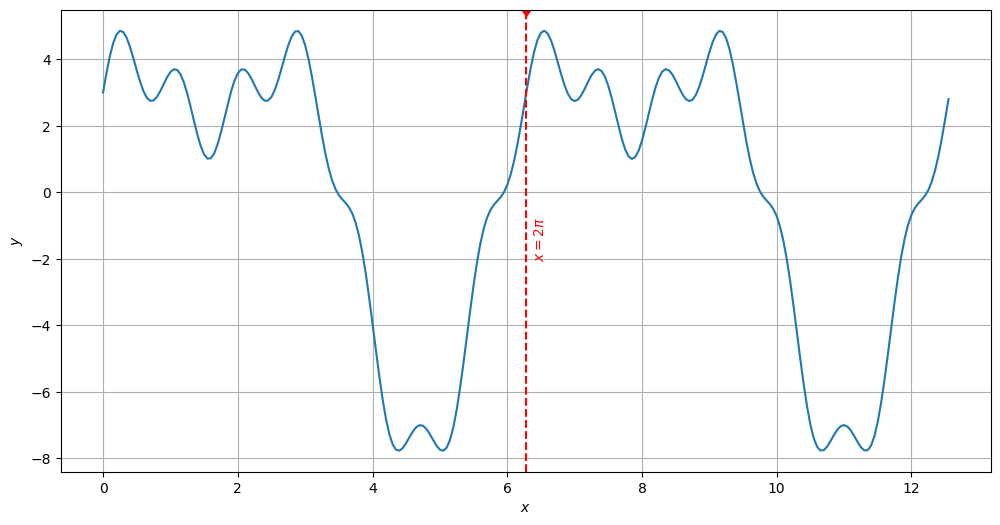

In [4]:
# Generate input vector:
T = 2*torch.pi
x_vec_full = torch.arange(start = 0, end = 2 * T, step = 0.05, dtype = torch.float64)

# Plot the function:
plt.figure(figsize=(12,6))
plt.plot(x_vec_full, f(x_vec_full))

# Draw a vertical line at the period:
plt.axvline(2*torch.pi, color='r', marker=11, ls='--')
plt.text(2*torch.pi+0.1,-2,r'$x=2\pi$',rotation=90, color='r')

# Draw grid, write labels:
plt.grid(True)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.plot()

We observe that, as expected, it is a periodic function with $T = 2 \pi$.

Let's now sample this function on a few equidistant points between $x \in [0, T]$:

In [5]:
T = 2.0 * torch.pi #Period
n = 32 #Number of points from which to compute the fourier series.

# Generate a input vector:
x_vec = torch.arange(start = 0, end = T + (T/n), step = T/n, dtype = torch.float64)
# !!! IMPORTANT !!! x_vec[0] must be equal to x_vec[-1] for the fourier series to be properly computed

# Sample the function:
function_sample = f(x_vec)

Let's see our sampled points against the original function:

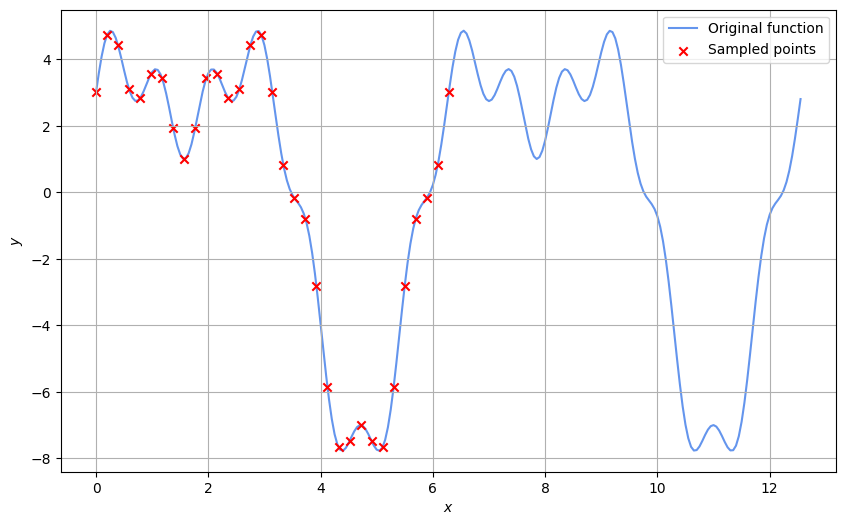

In [6]:
plt.figure(figsize=(10,6))
plt.plot(x_vec_full, f(x_vec_full), color="cornflowerblue",zorder=0)
plt.scatter(x_vec, function_sample, color="red",marker="x",zorder=1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid(True)
plt.legend(['Original function', 'Sampled points'])

Let us compute the fourier coefficients, using our custom class:

In [7]:
num_harmonics = 8
FS = TrigFourierSeries(T, function_sample, num_harmonics)

Let's use the ``x_vec_full`` to interpolate new points:

In [8]:
function_interpolated = FS.eval(x_vec_full)

Print the coefficients. We should see that ``Ak[1] = 3``, ``Bk[0] = 5`` , ``Bk[6] = 1`` and all the rest are zero (all within numerical precision). As expected:

In [9]:
print(FS.Ak)
print(FS.Bk)

tensor([-4.1633e-16,  3.0000e+00, -4.8572e-17,  1.6653e-15, -4.8919e-16,
        -4.3576e-15,  6.7654e-16,  9.3424e-16])
tensor([ 5.0000e+00,  1.6653e-16,  1.3912e-15, -1.0339e-15, -2.3037e-15,
        -3.6776e-16,  1.0000e+00,  2.6368e-16])


Finally, let's plot the original function against our approximated one:

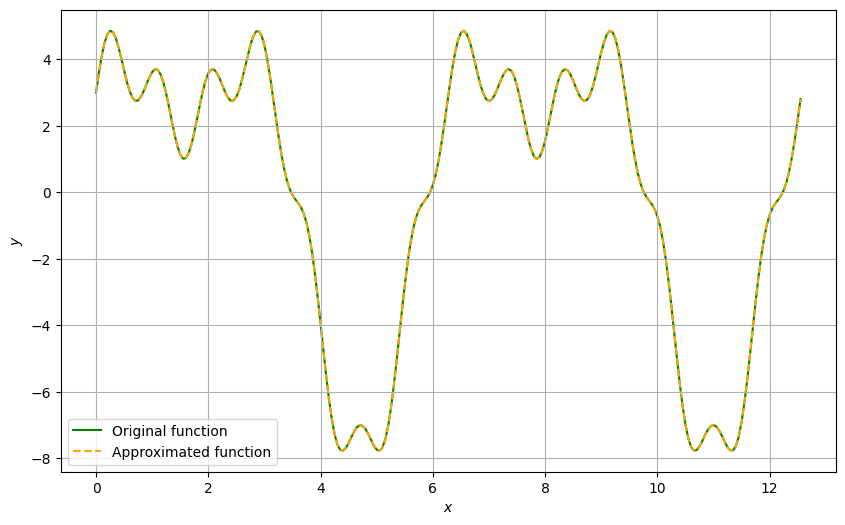

In [10]:
plt.figure(figsize=(10,6))
plt.plot(x_vec_full, f(x_vec_full), color="green",zorder=0)
plt.plot(x_vec_full, function_interpolated, color="orange",ls='--',zorder=1)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.grid(True)
plt.legend(['Original function', 'Approximated function'])

We are done here!